For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

Energy = 4.3409 + 3.0338 * Net_Activity
En unbiased estimator er en estimator hvor forventningsverdien er lik den sanne parameterverdien. 
Vår estimator er unbiased, da plottet vårt viser at punktene over og under linjen y=0 er omtrent jevnt fordelt. 


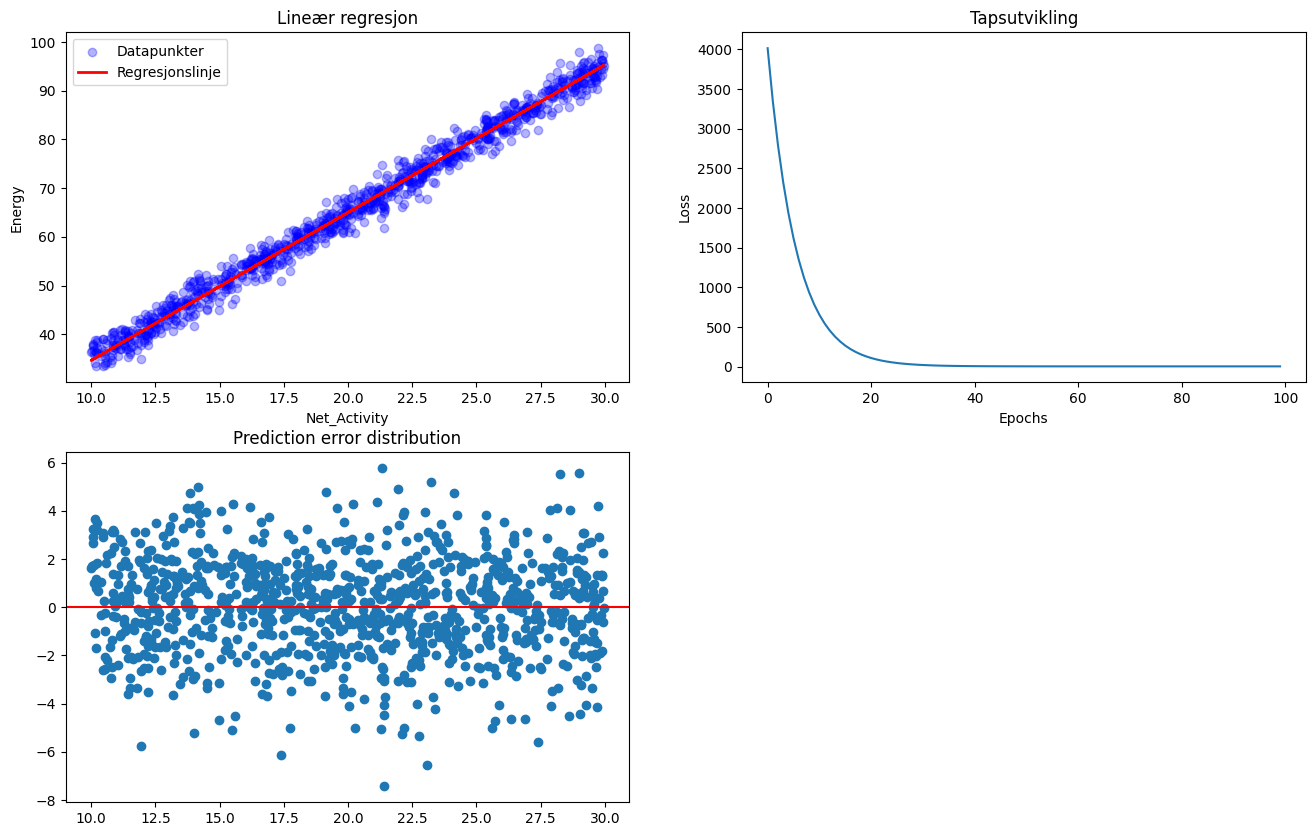

In [73]:
lr = LinearRegression()

#Hent data
df=pd.read_csv("mission1.csv")
df=df[["Net_Activity", "Energy"]]
X=df["Net_Activity"].values.reshape(-1,1)
y=df["Energy"].values

lr.fit(X, y)

y_pred=lr.predict(X)

plt.figure(figsize=(16, 10))

# Subplot 1: Data
plt.subplot(2, 2, 1)
plt.scatter(X, y, alpha=0.3, color='blue', label='Datapunkter')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresjonslinje')
plt.xlabel('Net_Activity')
plt.ylabel('Energy')
plt.legend()
plt.title('Lineær regresjon')

# Subplot 2: Tapsfunksjon
plt.subplot(2, 2, 2)
plt.plot(lr.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Tapsutvikling')

#Formelen for Energy er gitt ved
print(f"Energy = {lr.bias:.4f} + {lr.weights[0]:.4f} * Net_Activity")

pred_error=y-y_pred
plt.subplot(2, 2, 3)
plt.scatter(X, pred_error)
plt.axhline(y=0, color="red")
plt.title('Prediction error distribution')


print("En unbiased estimator er en estimator hvor forventningsverdien er lik den sanne parameterverdien. ")
print("Vår estimator er unbiased, da plottet vårt viser at punktene over og under linjen y=0 er omtrent jevnt fordelt. ")
plt.show()

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

Accuracy: 0.884
Accuracy DecisionTreeClassifier: 0.922


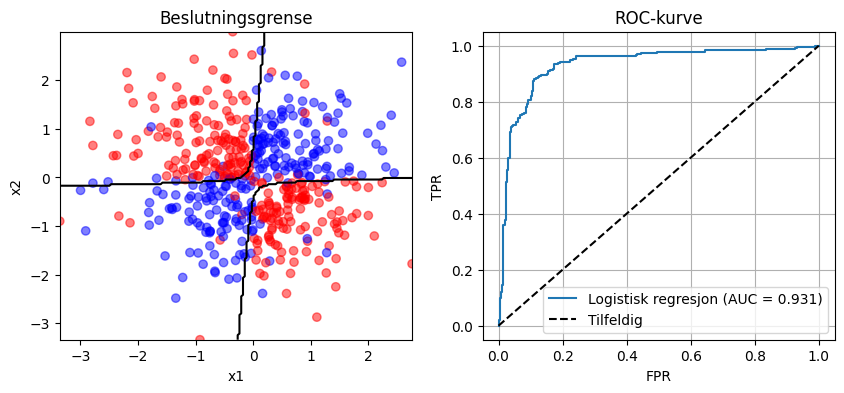

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from logistic_regression import LogisticRegression

logr=LogisticRegression()

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train=train[["x0", "x1"]].values
y_train=train["y"].values

X_test=test[["x0", "x1"]].values
y_test=test["y"].values

def feature_map(X_inp):     # Feature engineering
    X=np.asarray(np.transpose(X_inp), dtype=float)
    return np.column_stack([X[0], X[1], X[0]**2, X[1]**2, X[0]*X[1]])

X_train=feature_map(X_train)
X_test=feature_map(X_test)

# Fit og predict
logr.fit(X_train, y_train)
y_pred=logr.predict(X_test)
accuracy=np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

#Bruker linspace for plotting. lager 2D rutenett. 
xx, yy = np.meshgrid(np.linspace(X_train[:,0].min(), X_train[:,0].max(), 200), np.linspace(X_train[:,1].min(), X_train[:,1].max(), 200))

grid_points = np.column_stack((xx.ravel(), yy.ravel()))
gridX = feature_map(grid_points)    #Flater ut 2D til 1D slik at vi kan se i plot
z = logr.predict(gridX).reshape(xx.shape) 

# ROC-kurve

probs = logr.predict_probability(X_test) 
probs = np.asarray(probs).ravel()            # Reshape til 1D

fpr, tpr, _ = roc_curve(y_test, probs) # Beregner false positive rate og true positive rate
roc_auc = auc(fpr, tpr) #Finner areal under kurven

# Plotting:

plt.figure(figsize=(10, 4))

# Plot treningsdata med beslutningsgrense
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="bwr", alpha=0.5)
plt.contour(xx, yy, z, levels=[0.5], colors="black")
plt.xlabel("x1"); plt.ylabel("x2"); plt.title("Beslutningsgrense")

# Plot ROC-kurve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"Logistisk regresjon (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Tilfeldig")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-kurve")
plt.legend()
plt.grid(True)

# Decision tree
X_train_2d = X_train[:, :2]
X_test_2d  = X_test[:, :2]

tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=0)
tree.fit(X_train_2d, y_train)

y_pred = tree.predict(X_test_2d)
acc = (y_pred == y_test).mean()
print("Accuracy DecisionTreeClassifier:", acc)

plt.show()

## Discussion
a.
Modellen gjorde det dårlig i starten da den bare hadde de lineære sammenhengene mellom x0 og x1 den kunne studere. Når jeg ga den flere features gjennom feature engineering fant den raskt sammenhengen mellom x0 og x1 og accuracy gikk kraftig opp. 

b.
Modellen antar at det finnes sammenhenger for X^2, altså det at vi bruker feature engineering er en inductive bias. Vi bruker en logistisk regresjonsmodell med feature engineering, noe som går ut på å utvide dimensjonen til rommet utspent av featurene slik at vi kan bruke rette linjer i en høyere dimensjon, noe som igjen vil gi kurvede linjer når vi går tilbake til vårt orginale feature-rom.  

c. 
DecisionTreeClassifier løste problemet bedre enn min modell, med en accuracy på 0.922 vs 0.884. Dette har nok en sammenheng med flere ting, blant annet vil den bruke en annen terskel for å avgjøre hva som er en 1 eller 0. I tillegg er funksjonen bedrer til å løse data som er delt inn i ganske klare blokker eller soner, og den er også mindre tilbøyelig for ekstreme verdier.  

d. 
Se grafen til høyre for grafen for beslutningsgrensen.

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [ ]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [ ]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

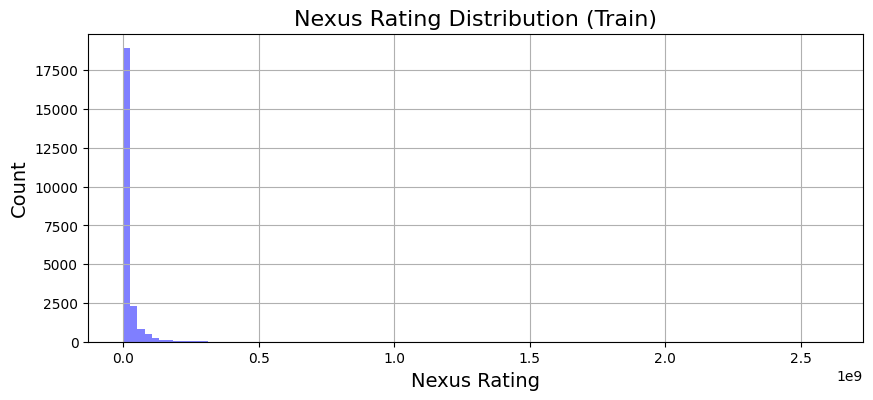

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [ ]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
